## Import Libraries
This step involves loading the dataset into a pandas DataFrame so we can work with it programmatically.

In [45]:
#!pip install matplotlib basemap basemap-data-hires

     ---------------------------------------- 0.0/507.8 kB ? eta -:--:--
      --------------------------------------- 10.2/507.8 kB ? eta -:--:--
     --- --------------------------------- 51.2/507.8 kB 525.1 kB/s eta 0:00:01
     ----------------------------- -------- 389.1/507.8 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 507.8/507.8 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/91.1 MB ? eta -:--:--
     ---------------------------------------- 0.5/91.1 MB 10.7 MB/s eta 0:00:09
      --------------------------------------- 1.2/91.1 MB 11.2 MB/s eta 0:00:09
      --------------------------------------- 1.6/91.1 MB 10.3 MB/s eta 0:00:09
      --------------------------------------- 2.1/91.1 MB 10.2 MB/s eta 0:00:09
     - -------------------------------------- 2.5/91.1 MB 9.8 MB/s eta 0:00:10
     - -------------------------------------- 3.1/91.1 MB 9.7 MB/s eta 0:00:10
     - -------------------------------------- 3.7/91.1 MB 9.9 M

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
#!pip install geopandas matplotlib

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     ---- ----------------------------------- 0.1/1.1 MB 1.3 MB/s eta 0:00:01
     ---------------------------- ----------- 0.8/1.1 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
     - -------------------------------------- 0.6/22.9 MB 12.6 MB/s eta 0:00:02
     -- ------------------------------------- 1.2/22.9 MB 15.2 MB/s eta 0:00:02
     --- ------------------------------------ 1.9/22.9 MB 13.1 MB/s eta 0:00:02
     ---- ----------------------------------- 2.5/22.9 MB 14.5 MB/s eta 0:00:02
     ----- ---------------------------------- 3.1/22.9 MB 13.3 MB/s eta 0:00:02
     ------- -------------------------------- 4.1/22.9 MB 14.4 MB/s eta 0:00:02
     -------- ------------------------------- 4.6/22.9 MB 14.8 MB/s eta 

Dataset:
https://platform.stratascratch.com/data-projects/terrorism-hotspots

## Load Dataset

In [2]:

#from google.colab import files


#uploaded = files.upload()

In [3]:
df = pd.read_csv("globalterrorismdb_0718dist.tar.bz2", compression="bz2", low_memory=False)

In [4]:
df.head()

,Unnamed: 0,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.shape

(181691, 136)

In [6]:
missing_values = df.isnull().sum()

In [7]:
missing_columns = missing_values[missing_values > 0]

In [8]:
print(missing_columns)

approxdate    172452
resolution    179471
provstate        421
city             434
latitude        4556
               ...  
addnotes      153402
scite1         66191
scite2        104758
scite3        138175
related       156653
Length: 106, dtype: int64


In [9]:
df.value_counts()

Series([], dtype: int64)

In [10]:
df.columns.tolist()

['Unnamed: 0',
 'eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',

# Question 1: How has the number of terrorist activities changed over the years? Are there certain regions where this trend is different from the global averages?

## Step 1: Data Cleaning
Data cleaning involves checking for and handling missing values, removing duplicates, and ensuring the data is in a consistent format. For this analysis, we specifically check for missing values in the iyear (year of the incident) and region_txt (region name) columns.

In [11]:

# Check for missing values in relevant columns
missing_values = df[['iyear', 'region_txt']].isnull().sum()

# Display missing values
print(missing_values, "\n")  # Print missing values with a line gap

# Print the shape of the original DataFrame
print(df.shape, "\n")  # Print the shape with a line gap

# If there are missing values, we can decide how to handle them (e.g., drop, fill)
df1 = df.dropna(subset=['iyear', 'region_txt'])

# Print the shape of the cleaned DataFrame
print(df1.shape)  # Print the shape of the cleaned DataFrame

iyear         0
region_txt    0
dtype: int64 

(181691, 136) 

(181691, 136)


Here, we drop rows where either iyear or region_txt is missing, and then print the shapes of both the original and cleaned DataFrames to understand how much data was removed.

## Step 2: Aggregate Data By Year
To see how terrorist activities have changed over the years, we count the number of incidents per year. This gives us a time series of the number of attacks each year.



In [12]:
# Aggregate the number of terrorist activities per year
global_trend = df1['iyear'].value_counts().sort_index()

# Convert to DataFrame for better handling
global_trend_df = global_trend.reset_index()
global_trend_df.columns = ['Year', 'Number of Attacks']  # Rename columns

# Print the DataFrame
#print(global_trend_df)


We use value_counts() to count the occurrences of each year and sort_index() to ensure the years are in chronological order. The result is converted to a DataFrame for easier manipulation and visualization.

Reason for Resetting the Index
When you use value_counts() on a DataFrame column, it returns a Series where the index is the unique values of that column (in this case, the years) and the values are the counts of those unique values (number of attacks per year). However, this Series does not have column names, which can make it less intuitive to work with, especially for plotting or further data manipulation.

By resetting the index, you transform this Series into a DataFrame. This allows you to give meaningful names to the columns, making the DataFrame easier to interpret.

## Step 3:  Aggregate Data by Region and Year
We count the number of incidents per year for each region to compare regional trends with the global trend.

In [13]:
# Aggregate the number of terrorist activities per year for each region
regional_trend = df1.groupby(['region_txt', 'iyear']).size().unstack(fill_value=0)

# Convert to DataFrame for better handling
regional_trend_df = regional_trend.reset_index()

# Remove index name
regional_trend_df.columns.name = None

# By setting columns.name to None, we remove any potential name for the columns index, which might have been set during the groupby and unstack operations.
# Before removing the index name, the DataFrame might implicitly carry a name for the columns index, which can be visually cluttering or unnecessarily confusing.

# Print the DataFrame
#print(regional_trend_df)


Using groupby() with both region_txt and iyear, we count the number of incidents for each combination. unstack() reshapes the data so that years become columns, and each row represents a region.

## Step 4: : Visualization
We visualize the trends to make the analysis clear and intuitive. We create line plots for both the global trend and the regional trends.

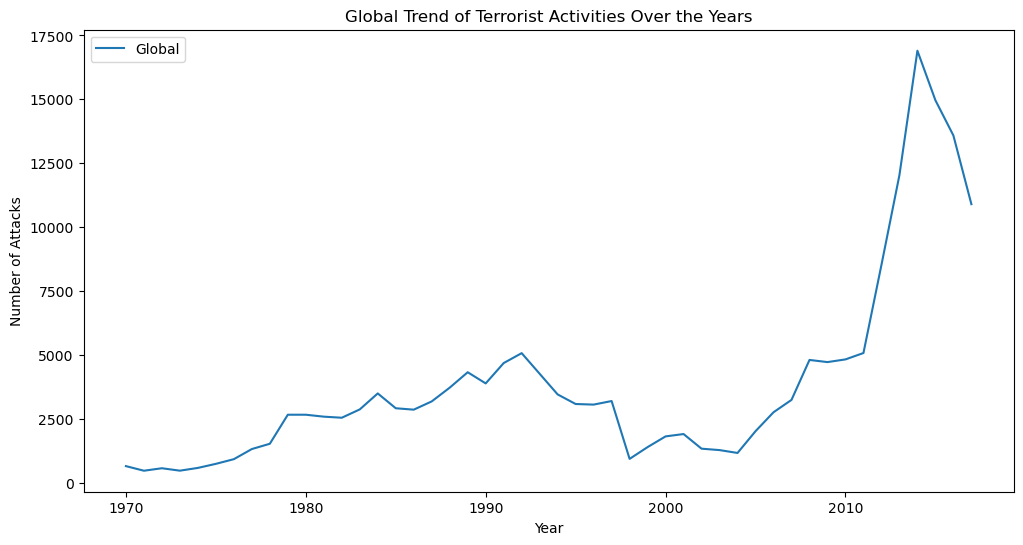

In [14]:
# Line Chart Plot the global trend
plt.figure(figsize=(12, 6))
plt.plot(global_trend_df['Year'], global_trend_df['Number of Attacks'], label='Global')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Global Trend of Terrorist Activities Over the Years')
plt.legend()
plt.show()



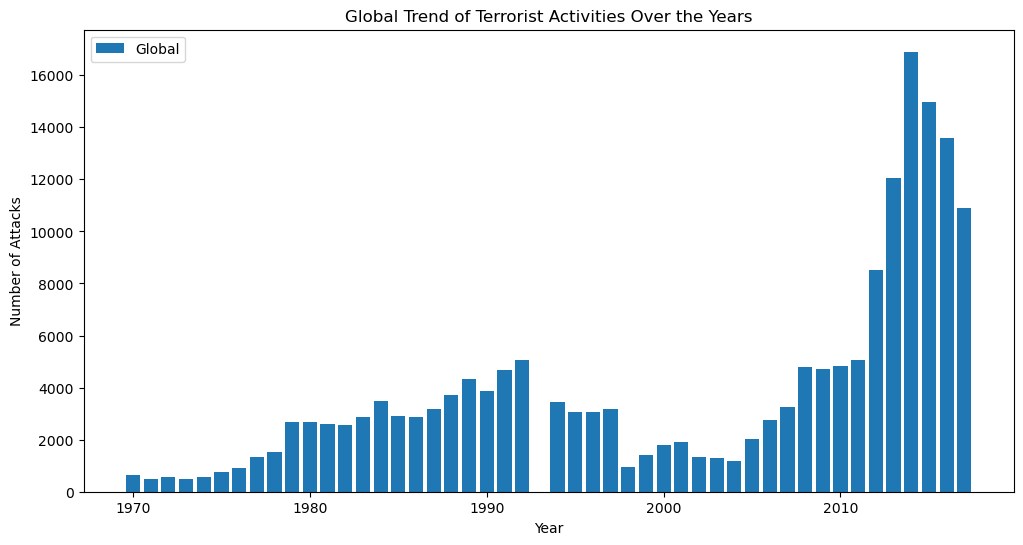

In [15]:
# Bar Plot the global trend
plt.figure(figsize=(12, 6))
plt.bar(global_trend_df['Year'], global_trend_df['Number of Attacks'], label='Global')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Global Trend of Terrorist Activities Over the Years')
plt.legend()
plt.show()

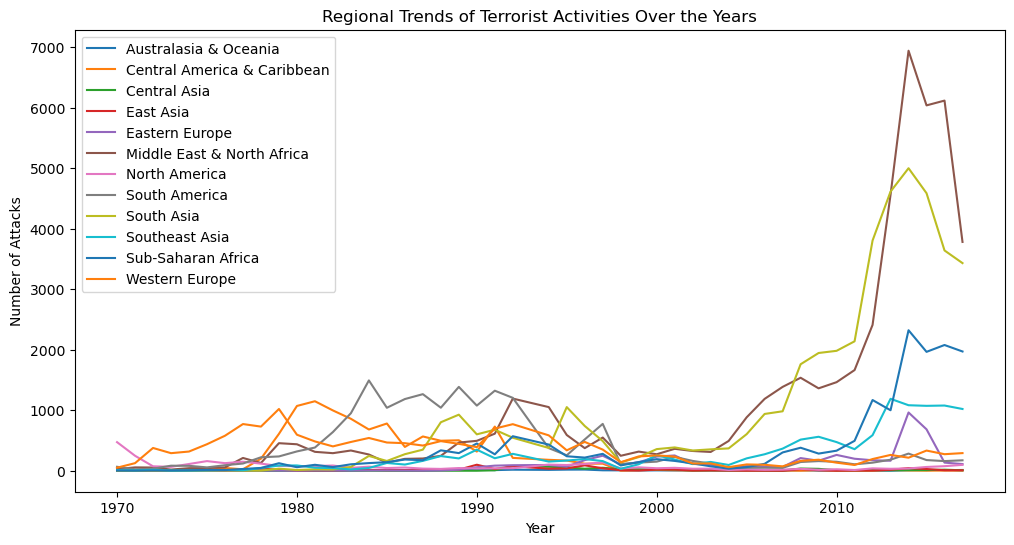

In [16]:
# Plot regional trends
plt.figure(figsize=(12, 6))

for region in regional_trend_df['region_txt']:
    plt.plot(regional_trend_df.columns[1:], regional_trend_df.loc[regional_trend_df['region_txt'] == region].values[0][1:], label = region)

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Regional Trends of Terrorist Activities Over the Years')
plt.legend()
plt.show()


**plt.plot(...):**

This line plots the trend for the current region in the loop. Let's break down the arguments inside the plt.plot() function:

**regional_trend_df.columns[1:]:**

This selects all the column names from the second column onward (i.e., the years) because the first column (index 0) is region_txt. This forms the x-axis values (years).

**regional_trend_df.loc[regional_trend_df['region_txt'] == region].values[0][1:]:**

This filters the DataFrame to get the row corresponding to the current region in the loop.

It uses **.loc** to locate the row where region_txt equals the current region.

**values[0]**  converts this row into an array

**[1:]**  selects all elements from the second element onward (i.e., the counts of terrorist activities for each year). This forms the y-axis values (number of attacks).

**label = region**: This sets the label for the plot line to the current region. This label will be used in the legend to identify which line corresponds to which region.

# Maximum number of killings for each region

In [17]:
# Cleaning null values from the required columns
print("Before cleaning shape is: ",df1.shape)

df2 = df1.dropna(subset=['iyear', 'region_txt', 'nkill'])
print("After cleaning shape is: ", df2.shape)

Before cleaning shape is:  (181691, 136)
After cleaning shape is:  (171378, 136)


In [18]:
# Check if necessary columns exist

if 'region_txt' in df2.columns and 'nkill' in df2.columns:
    # Group by region and find max number of killings in each  region
    max_killings_per_region = df2.groupby('region_txt')['nkill'].max().reset_index()
    max_killings_per_region = max_killings_per_region.sort_values(by = 'nkill', ascending = False)
    
    #Print the results
    print(max_killings_per_region)

else:
    print("the required columns ('region_txt' and 'nkill') are not present in the Dataframe")

                     region_txt   nkill
5    Middle East & North Africa  1570.0
6                 North America  1384.0
10           Sub-Saharan Africa  1180.0
8                    South Asia   518.0
4                Eastern Europe   344.0
1   Central America & Caribbean   300.0
7                 South America   275.0
11               Western Europe   270.0
3                     East Asia   184.0
9                Southeast Asia   116.0
2                  Central Asia    50.0
0         Australasia & Oceania    17.0


# Is the number of incidents and the number of casualties correlated? Can you spot any irregularities or outliers?

In [19]:
# Check if the necessary columns exist

if 'iyear' in df1.columns and 'nkill' in df1.columns:
    
    #Aggregate the number of incidents and total casualties per year
    
    incidents_per_year = df1['iyear'].value_counts().sort_index()
    casualties_per_year = df1.groupby('iyear')['nkill'].sum()
    
    # Convert to DataFrame for better Handling
    
    incidents_casualties_df = pd.DataFrame({
        'Year': incidents_per_year.index,
        'Number_of_Incidents': incidents_per_year.values,
        'Number_of_Casualties': casualties_per_year.values
    })
    
    #Print the new dataframe
    
    print(incidents_casualties_df)
    
    # Calculate the corelation coeffecient
    
    correlation = incidents_casualties_df['Number_of_Incidents'].corr(incidents_casualties_df['Number_of_Casualties'])
    
    # Display the correlation
    
    print(f'Correlation between Number of Incidents and Casualties: {correlation: .2f}')

else:
    print("The required columns ('iyear' and 'nkill') are not present in the DataFrame.")
    
    

    Year  Number_of_Incidents  Number_of_Casualties
0   1970                  651                 174.0
1   1971                  471                 173.0
2   1972                  568                 566.0
3   1973                  473                 370.0
4   1974                  581                 539.0
5   1975                  740                 617.0
6   1976                  923                 674.0
7   1977                 1319                 456.0
8   1978                 1526                1459.0
9   1979                 2662                2100.0
10  1980                 2662                4400.0
11  1981                 2586                4851.0
12  1982                 2544                5136.0
13  1983                 2870                9444.0
14  1984                 3495               10450.0
15  1985                 2915                7094.0
16  1986                 2860                4976.0
17  1987                 3183                6482.0
18  1988    

## Visualization

Text(0, 0.5, 'Number of Casualties')

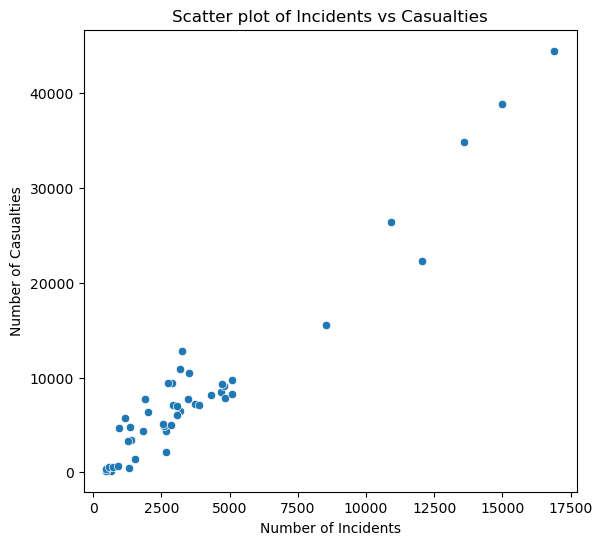

In [20]:
# Plot the data

plt.figure(figsize = (14,6))

# Scatter Plot

plt.subplot(1,2,1)
sns.scatterplot(x='Number_of_Incidents', y = 'Number_of_Casualties', data = incidents_casualties_df)
plt.title('Scatter plot of Incidents vs Casualties')
plt.xlabel('Number of Incidents')
plt.ylabel('Number of Casualties')

The scatter plot indicates a positive correlation between the number of incidents and the number of casualties, with the points showing an upward trend. However, to quantify this relationship and identify any irregularities or outliers, let's break down the analysis:

Correlation Coefficient
The scatter plot visually suggests a positive relationship, but calculating the Pearson correlation coefficient will give us a numerical value to understand the strength of this relationship.

Identifying Outliers
In the scatter plot, data points that deviate significantly from the overall trend can be considered outliers. For example, if most points are clustered within a certain range, but a few points are far removed, these could indicate years with unusually high or low casualties relative to the number of incidents.

In [21]:
 # Identify outliers using IQR (Interquartile Range) method
Q1 = incidents_casualties_df['Number_of_Casualties'].quantile(0.25)
Q3 = incidents_casualties_df['Number_of_Casualties'].quantile(0.75)
IQR = Q3 - Q1
outliers = incidents_casualties_df[(incidents_casualties_df['Number_of_Casualties'] < (Q1 - 1.5 * IQR)) | 
                                   (incidents_casualties_df['Number_of_Casualties'] > (Q3 + 1.5 * IQR))]

    # Display outliers
print("Outliers identified:")
print(outliers)

Outliers identified:
    Year  Number_of_Incidents  Number_of_Casualties
42  2013                12036               22273.0
43  2014                16903               44490.0
44  2015                14965               38853.0
45  2016                13587               34871.0
46  2017                10900               26445.0


The identified outliers indicate that there are certain years where the number of casualties significantly deviates from the norm. Here’s a more detailed analysis of these results:

Analysis of Outliers

Understanding the Outliers

The years 2013, 2014, 2015, 2016, and 2017 have been identified as outliers.
These years have a much higher number of casualties compared to other years, based on the IQR method.
Possible Reasons for Outliers

Increased Terrorist Activity: These years may have experienced an increased number of significant terrorist attacks, leading to a higher number of casualties.

High-Impact Incidents: Certain high-profile attacks with a large number of casualties could skew the data for these years.

Improved Reporting: Better data collection and reporting mechanisms over these years might also contribute to higher recorded casualties.

Detailed Insights

Year 2013:

Incidents: 12,036

Casualties: 22,273

Insight: This year shows a high number of incidents and casualties. It indicates a notable spike in terrorist activities.

Year 2014:

Incidents: 16,903

Casualties: 44,490

Insight: This year stands out with the highest number of incidents and casualties. It indicates a particularly intense period of terrorist activities.

Year 2015:

Incidents: 14,965

Casualties: 38,853

Insight: While the number of incidents is slightly lower than 2014, the casualties remain significantly high, suggesting several high-casualty events.

Year 2016:

Incidents: 13,587

Casualties: 34,871

Insight: The trend of high casualties continues, although the number of incidents is slightly decreasing.

Year 2017:

Incidents: 10,900

Casualties: 26,445

Insight: There’s a notable decrease in the number of incidents, but the casualties remain high, indicating more severe attacks or more effective attack execution.

To better understand these outliers, we can visualize the incidents and casualties over the years with a focus on these outlier years.

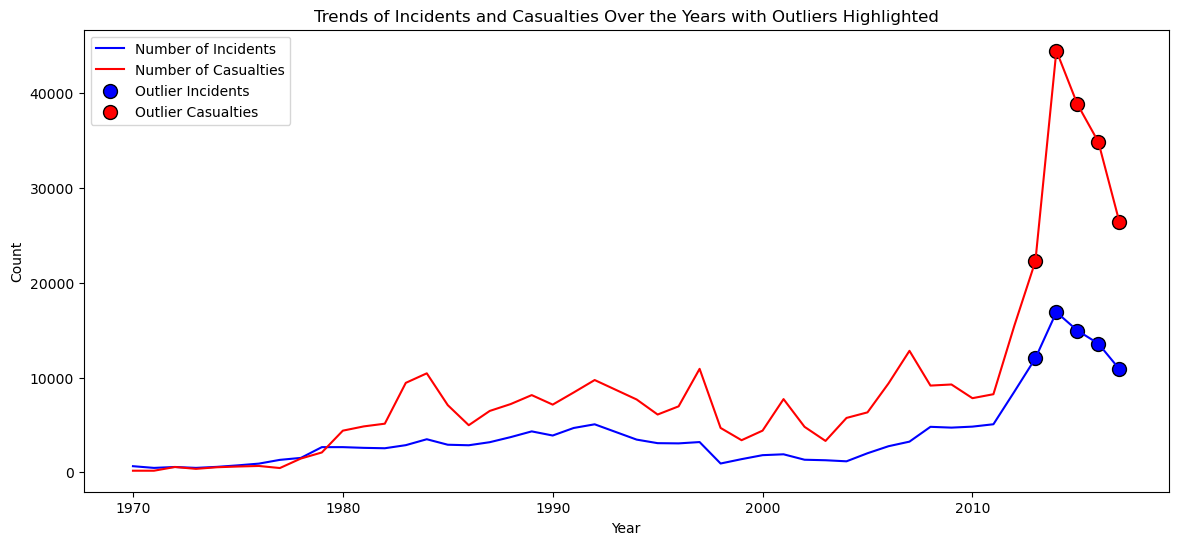

In [22]:
# DataFrame with outliers
outliers = incidents_casualties_df[(incidents_casualties_df['Year'].isin([2013, 2014, 2015, 2016, 2017]))]

# Plotting the trends with outliers highlighted
plt.figure(figsize=(14, 6))

# Line plot for incidents and casualties over the years
plt.plot(incidents_casualties_df['Year'], incidents_casualties_df['Number_of_Incidents'], label='Number of Incidents', color='blue')
plt.plot(incidents_casualties_df['Year'], incidents_casualties_df['Number_of_Casualties'], label='Number of Casualties', color='red')

# Highlighting outliers
plt.scatter(outliers['Year'], outliers['Number_of_Incidents'], color='blue', s=100, edgecolor='black', label='Outlier Incidents')
plt.scatter(outliers['Year'], outliers['Number_of_Casualties'], color='red', s=100, edgecolor='black', label='Outlier Casualties')

plt.title('Trends of Incidents and Casualties Over the Years with Outliers Highlighted')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

**Conclusion**

The identified outliers suggest periods of unusually high terrorist activity and casualties. Understanding the context of these years through additional historical and geopolitical analysis can provide further insights into the reasons behind these spikes. This can help in devising strategies to mitigate such high-casualty incidents in the future.

# What are the most common methods of attacks? Does it differ in various regions or in time?

## Count the Occurances of each attack

In [28]:
global_attack_methods = df1['attacktype1_txt'].value_counts()

print("The most common attacking methods are:\n",global_attack_methods)

The most common attacking methods are:
 Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64


## Analyze the Distribution of Attack Methods Across Different Regions

In [36]:
# Groupby attack type and region to count occurances

regional_attack_methods = df1.groupby(['region_txt', 'attacktype1_txt']).size().unstack(fill_value = 0)

print("Distribution of Attack Methods by Region:")
print(regional_based_attacks)

Distribution of Attack Methods by Region:
attacktype1_txt              Armed Assault  Assassination  Bombing/Explosion  \
region_txt                                                                     
Australasia & Oceania                   51             36                 75   
Central America & Caribbean           4361           1254               3239   
Central Asia                           116            115                235   
East Asia                              117             55                330   
Eastern Europe                        1274            400               2766   
Middle East & North Africa            9273           4206              30908   
North America                          448            255               1534   
South America                         3875           2745               9039   
South Asia                           11404           4301              21246   
Southeast Asia                        4022           1369               4818  

## Analyze the Distribution of Attack Methods Over Time

In [32]:
# Group by year and attack type to count occurrences
time_attack_methods = df1.groupby(['iyear', 'attacktype1_txt']).size().unstack(fill_value=0)

# Display the distribution of attack methods over time
print("Distribution of Attack Methods Over Time:")
print(time_attack_methods)

Distribution of Attack Methods Over Time:
attacktype1_txt  Armed Assault  Assassination  Bombing/Explosion  \
iyear                                                              
1970                        61             22                333   
1971                        44             70                239   
1972                        63            265                188   
1973                        62            164                149   
1974                        46            158                285   
1975                        81            181                370   
1976                       124            204                419   
1977                       255            146                635   
1978                       241            263                644   
1979                       447            526               1058   
1980                       574            618                997   
1981                       697            405               1082   
1982  

## Visualization

### Most Common Methods of Attacks Globally

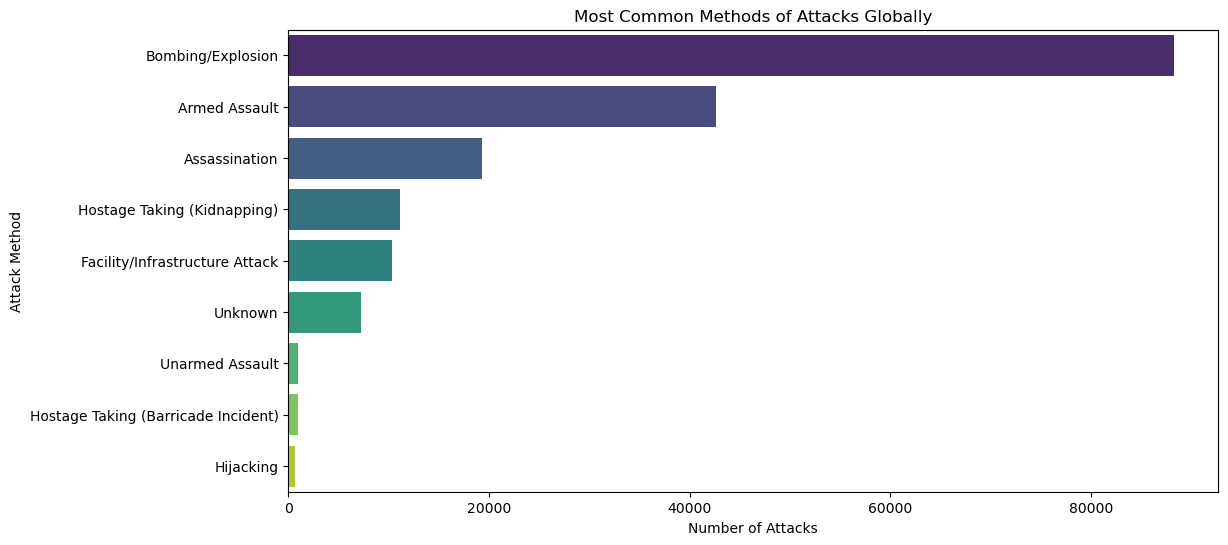

In [34]:
# Plot the most common attack methods globally
plt.figure(figsize=(12, 6))
sns.barplot(x=global_attack_methods.values, y=global_attack_methods.index, palette="viridis")
plt.title('Most Common Methods of Attacks Globally')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Method')
plt.show()

The bar chart titled **"Most Common Methods of Attacks Globally"** shows the frequency of different attack methods:

**Bombing/Explosion:** This is the most common method, with a significantly higher number of attacks compared to others.

**Armed Assault:** The second most common method.

**Assassination, Hostage Taking (Kidnapping)**, and **Facility/Infrastructure** Attack follow in frequency.

**Hijacking, Hostage Taking (Barricade Incident), and Unarmed Assault** are the least common methods.

### Distribution of Attack Methods by Region

<Figure size 1400x800 with 0 Axes>

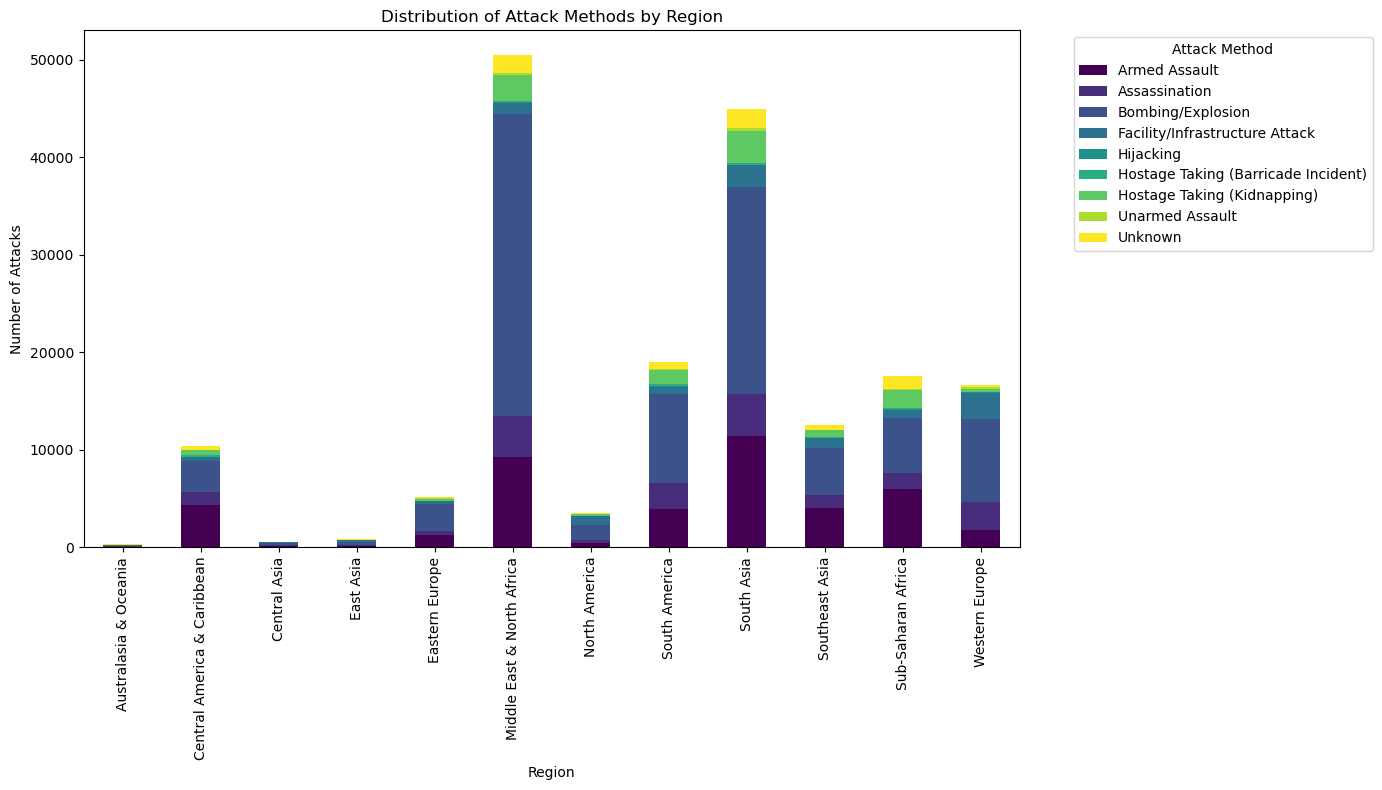

In [37]:
# Plot the distribution of attack methods by region
plt.figure(figsize=(14, 8))
regional_attack_methods.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Attack Methods by Region')
plt.xlabel('Region')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The stacked bar chart titled **"Distribution of Attack Methods by Region"** shows how different attack methods are distributed across various regions:

**Middle East & North Africa** and **South Asia** have the **highest** number of attacks, with **Bombing/Explosion and Armed Assault** being the most common methods in these regions.

**Sub-Saharan Africa, Southeast Asia, and Western Europe** also show a significant number of attacks, but the distribution of methods varies. For instance, **Hostage Taking** is more common in **Sub-Saharan Africa** compared to **Western Europe**.

**Central Asia and East Asia** have the **least** number of attacks, with a relatively **even** distribution among the various methods.

### Distribution of Attack Methods Over Time

<Figure size 1400x800 with 0 Axes>

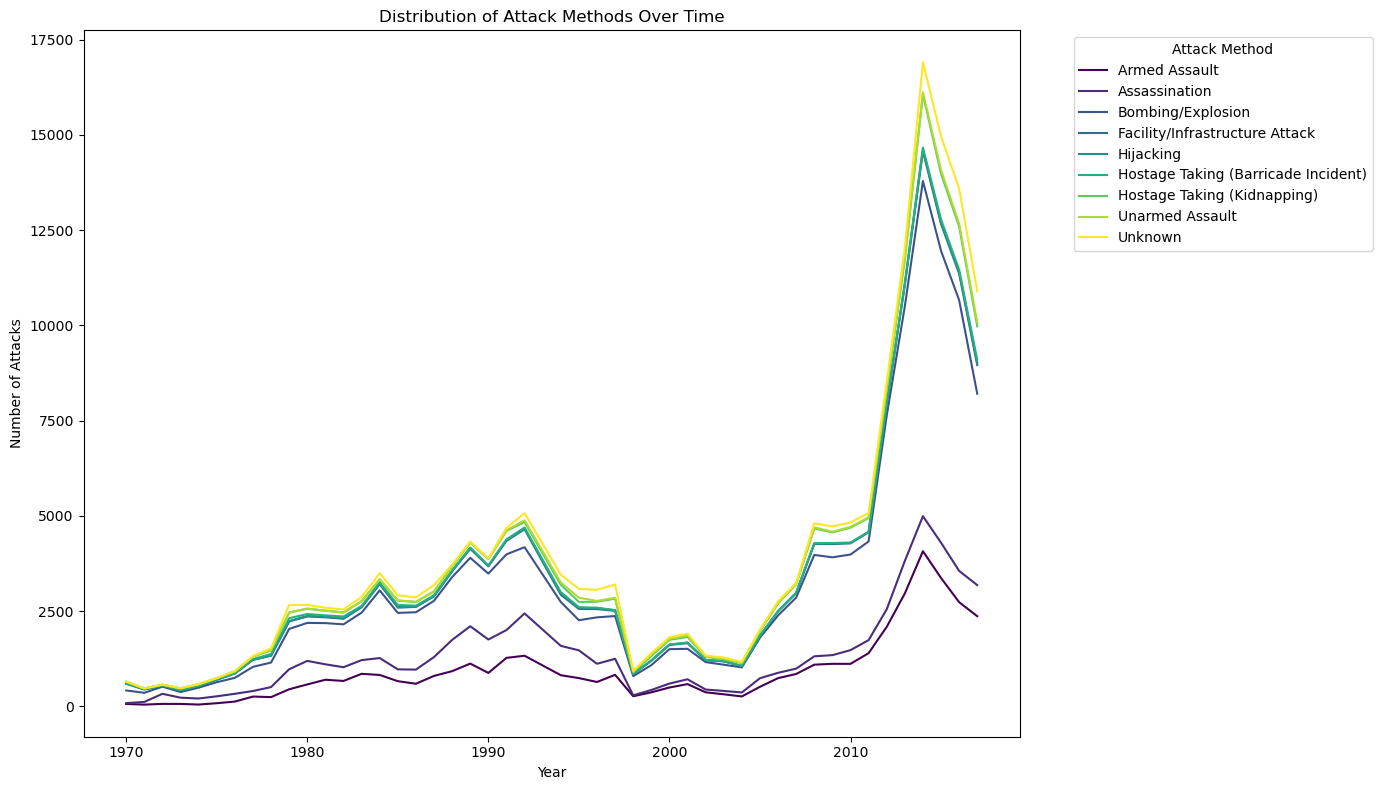

In [38]:
# Plot the distribution of attack methods over time
plt.figure(figsize=(14, 8))
time_attack_methods.plot(kind='line', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Distribution of Attack Methods Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The line chart titled **"Distribution of Attack Methods Over Time"** illustrates how the frequency of different attack methods has changed from 1970 to around 2016:

**Bombing/Explosion and Armed Assault** show a significant increase over time, **peaking** around the **early 2010s**.

There are noticeable peaks and troughs corresponding to specific historical events, such as the rise and fall of certain terrorist groups or geopolitical conflicts.

Other methods like **Assassination and Hostage Taking** also show **periodic increases** but are generally **less frequent** compared to **Bombing/Explosion and Armed Assault**.

**Conclusions**

**Global Trends:**

Bombing/Explosion and Armed Assault are the predominant methods of terrorist attacks globally.

**Regional Differences:**

Middle East & North Africa and South Asia are hotspots for terrorist activities, particularly Bombing/Explosion and Armed Assault.

Regions like Central Asia and East Asia have fewer attacks, with no particular method standing out.

**Temporal Trends:**

There has been a general increase in the number of attacks over time, with significant peaks in the early 2010s.
The most common methods (Bombing/Explosion and Armed Assault) have shown the most significant increases.



# Plot the locations of attacks on a map to visualize their regional spread

In [58]:
fig = px.scatter_geo(df1.head(10000),lat='latitude',lon='longitude', symbol='region_txt',
                     hover_name="country_txt",
                     hover_data=['weaptype1_txt', 'region_txt'])
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()